In [1]:
import findspark
findspark.init()
findspark.find()

import pyspark
findspark.find()

'E:\\Spark-env\\spark'

In [2]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[2]") \
    .appName("Goodbooks_Recommendation_System") \
    .getOrCreate()

sc = spark.sparkContext

In [3]:
spark

# Data Preparation and Exploratory  Data Analysis (EDA)

In [4]:
# import to_read dataset

file_location = "E:/Mata Kuliah/Semester 8/Pengelolaan Data Besar/Week 13/Proyek/Data/to_read.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
to_read = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(to_read)

to_read.createOrReplaceTempView("to_read")

DataFrame[user_id: int, book_id: int]

In [5]:
to_read.show(5)
to_read.printSchema()

+-------+-------+
|user_id|book_id|
+-------+-------+
|      1|    112|
|      1|    235|
|      1|    533|
|      1|   1198|
|      1|   1874|
+-------+-------+
only showing top 5 rows

root
 |-- user_id: integer (nullable = true)
 |-- book_id: integer (nullable = true)



In [6]:
#import ratings datase
file_location = "E:/Mata Kuliah/Semester 8/Pengelolaan Data Besar/Week 13/Proyek/Data/ratings.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
ratings = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(ratings)

ratings.createOrReplaceTempView("ratings")

DataFrame[book_id: int, user_id: int, rating: int]

In [7]:
ratings.show(5)
ratings.printSchema()

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
+-------+-------+------+
only showing top 5 rows

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [8]:
#import books dataset
file_location = "E:/Mata Kuliah/Semester 8/Pengelolaan Data Besar/Week 13/Proyek/Data/books.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
books = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sto_readep", delimiter) \
  .load(file_location)

display(books)

books.createOrReplaceTempView("books")

DataFrame[id: int, book_id: int, best_book_id: int, work_id: int, books_count: int, isbn: string, isbn13: double, authors: string, original_publication_year: double, original_title: string, title: string, language_code: string, average_rating: string, ratings_count: string, work_ratings_count: string, work_text_reviews_count: string, ratings_1: double, ratings_2: int, ratings_3: int, ratings_4: int, ratings_5: int, image_url: string, small_image_url: string]

In [9]:
books.show(5)
books.printSchema()

+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id|book_id|best_book_id|work_id|books_count|     isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------

In [10]:
# Convert books dataser menjadi pandas dataframe

books_df = books.toPandas()
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715.0,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504.0,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191.0,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427.0,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236.0,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [11]:
import pandas as pd
import numpy as np

books_df = books_df[books_df.ratings_count.str.isdigit() == True]

In [12]:
books_df.ratings_count = books_df.ratings_count.astype('int')

In [13]:
#Top books with most number of ratings on goodbooks

books_df.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating' ]][0:10]

,original_title,ratings_count,average_rating
0,The Hunger Games,4780653,4.34
1,Harry Potter and the Philosopher's Stone,4602479,4.44
2,Twilight,3866839,3.57
3,To Kill a Mockingbird,3198671,4.25
4,The Great Gatsby,2683664,3.89
5,The Fault in Our Stars,2346404,4.26
6,The Hobbit or There and Back Again,2071616,4.25
7,The Catcher in the Rye,2044241,3.79
9,Pride and Prejudice,2035490,4.24
8,Angels & Demons,2001311,3.85


**Printing top books with most number of ratings**

In [14]:
most_ratings = books_df.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating', 'image_url' ]][0:10]

In [15]:
import pandas as pd
from IPython.display import Image, HTML
most_ratings['img_html'] = most_ratings['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(most_ratings[['original_title', 'img_html', 'ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
0,The Hunger Games,,4780653,4.34
1,Harry Potter and the Philosopher's Stone,,4602479,4.44
2,Twilight,,3866839,3.57
3,To Kill a Mockingbird,,3198671,4.25
4,The Great Gatsby,,2683664,3.89
5,The Fault in Our Stars,,2346404,4.26
6,The Hobbit or There and Back Again,,2071616,4.25
7,The Catcher in the Rye,,2044241,3.79
9,Pride and Prejudice,,2035490,4.24
8,Angels & Demons,,2001311,3.85


**Printing top books with highest average ratings**

In [16]:
books_df.average_rating = books_df.average_rating.astype('float')

In [17]:
#Top books with top average ratings on goodbooks

books_df.sort_values(by = 'average_rating', ascending = False)[['original_title','ratings_count', 'average_rating' ]][0:10]

,original_title,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,28900,4.82
861,Words of Radiance,73572,4.77
3274,None,33220,4.77
8853,Mark of the Lion Trilogy,9081,4.76
7946,None,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,16766,4.74
421,Complete Harry Potter Boxed Set,190050,4.74
6589,The Authoritative Calvin and Hobbes,16087,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin ...,14597,4.73


In [18]:
high_rating_books = books_df.sort_values(by = 'average_rating', ascending = False)[['original_title','ratings_count','image_url', 'average_rating' ]][0:10]

In [19]:
high_rating_books['img_html'] = high_rating_books['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(high_rating_books[['original_title', 'img_html','ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,,28900,4.82
861,Words of Radiance,,73572,4.77
3274,None,,33220,4.77
8853,Mark of the Lion Trilogy,,9081,4.76
7946,None,,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Collection,,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobbes Collection,,16766,4.74
421,Complete Harry Potter Boxed Set,,190050,4.74
6589,The Authoritative Calvin and Hobbes,,16087,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury,,14597,4.73


In [20]:
authors_with_most_books = pd.DataFrame(books_df.authors.value_counts()[0:10]).reset_index()
authors_with_most_books.columns = ['author', 'number_of_books']

In [21]:
 authors_with_most_books

,author,number_of_books
0,Stephen King,60
1,Nora Roberts,59
2,Dean Koontz,47
3,Terry Pratchett,42
4,Agatha Christie,39
5,Meg Cabot,37
6,James Patterson,36
7,David Baldacci,34
8,J.D. Robb,33
9,John Grisham,33


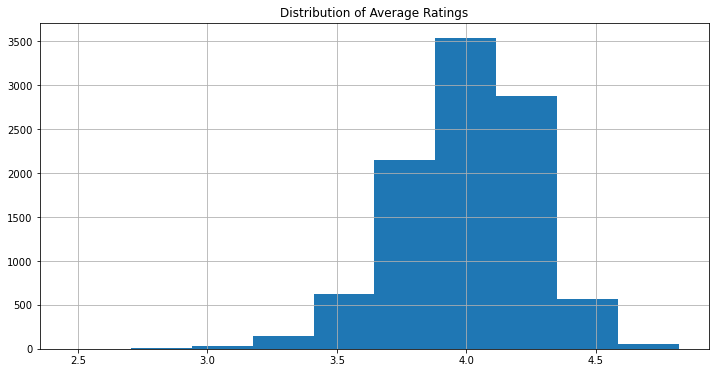

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Distribution of Average Ratings')
books_df['average_rating'].hist()
display()

In [23]:
# Menghitung total number of ratings pada dataset
numerator = ratings.select("rating").count()

# Menghitung number of distinct Id's
num_users = ratings.select("user_id").distinct().count()
num_items = ratings.select("book_id").distinct().count()

# Denominator sama dengan number of users multiplied berdasarkan number of items
denominator = num_users * num_items

sparsity = (1.0 - (numerator * 1.0)/ denominator) * 100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  99.82% empty.


In [24]:
# GroupBy dan Filter Methods
# Exploratory Data Analysis (EDA)

from pyspark.sql.functions import col, min, max, avg, lit

# Group data berdasarkan user_id dan count ratings
(ratings.groupBy("user_id")
    .count()
    .filter("`count` > 1")
    .sort(col("count").desc())
    .show(n = 10))

+-------+-----+
|user_id|count|
+-------+-----+
|  12874|  200|
|  30944|  200|
|  12381|  199|
|  28158|  199|
|  52036|  199|
|   6630|  197|
|  45554|  197|
|  37834|  197|
|  19729|  196|
|   9806|  196|
+-------+-----+
only showing top 10 rows



In [25]:
# Group data berdasarkan book_id dan count ratings
(ratings.groupBy("book_id")
    .count()
    .filter("`count` > 1")
    .sort(col("count").desc())
    .show(n = 10))

+-------+-----+
|book_id|count|
+-------+-----+
|    148|  100|
|    463|  100|
|    471|  100|
|    496|  100|
|    833|  100|
|   1088|  100|
|   1238|  100|
|   1342|  100|
|   1580|  100|
|   1591|  100|
+-------+-----+
only showing top 10 rows



**Summary Statistics**

In [26]:
# Min num ratings
print("Item dengan peringkat (rating) paling sedikit: ")
ratings.groupBy("book_id").count().select(min("count")).show()

Item dengan peringkat (rating) paling sedikit: 
+----------+
|min(count)|
+----------+
|         8|
+----------+



In [27]:
# Avg num ratings 
print("Nilai rata-rata rating per item: ")
ratings.groupBy("book_id").count().select(avg("count")).show()

Nilai rata-rata rating per item: 
+----------+
|avg(count)|
+----------+
|   98.1756|
+----------+



In [28]:
# Min num ratings untuk pengguna
print("Pengguna dengan peringkat (rating) paling sedikit: ")
ratings.groupBy("user_id").count().select(min("count")).show()

Pengguna dengan peringkat (rating) paling sedikit: 
+----------+
|min(count)|
+----------+
|         2|
+----------+



In [29]:
# Min num ratings 
print("Item dengan peringkat (rating) paling sedikit: ")
ratings.groupBy("book_id").count().sort('count').show(10)

Item dengan peringkat (rating) paling sedikit: 
+-------+-----+
|book_id|count|
+-------+-----+
|   7803|    8|
|   9345|   11|
|   9486|   24|
|   1935|   34|
|   9315|   36|
|   9553|   41|
|   8181|   44|
|   9260|   46|
|   9479|   47|
|   9705|   48|
+-------+-----+
only showing top 10 rows



In [30]:
# Avg num ratings per users
print("Nilai rata-rata rating per pengguna: ")
ratings.groupBy("user_id").count().select(avg("count")).show()

Nilai rata-rata rating per pengguna: 
+------------------+
|        avg(count)|
+------------------+
|18.376684636118597|
+------------------+



In [31]:
#1 million ratings
ratings.describe().show()

+-------+-----------------+------------------+------------------+
|summary|          book_id|           user_id|            rating|
+-------+-----------------+------------------+------------------+
|  count|           981756|            981756|            981756|
|   mean|4943.275635697668|25616.759933221696|3.8565335989797873|
| stddev|2873.207414896114|15228.338825882167|0.9839408559620033|
|    min|                1|                 1|                 1|
|    max|            10000|             53424|                 5|
+-------+-----------------+------------------+------------------+



In [32]:
# Buku yang memeilikki 100 rating

ratings.groupby('book_id').count().show()

+-------+-----+
|book_id|count|
+-------+-----+
|    148|  100|
|    463|  100|
|    471|  100|
|    496|  100|
|    833|  100|
|   1088|  100|
|   1238|  100|
|   1342|  100|
|   1580|  100|
|   1591|  100|
|   1645|  100|
|   1829|  100|
|   1959|  100|
|   2122|  100|
|   2142|  100|
|   2366|  100|
|   2659|  100|
|   2866|  100|
|   3175|  100|
|   3749|  100|
+-------+-----+
only showing top 20 rows

